In [1]:
from pylab import *

import seaborn as sns

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)
sns.set_context("poster")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

In [3]:
N = int(1e6)
z = uniform(size=N)**(-3.0 + 1)
z = sort(z)

In [4]:
cdf = arange(1, N+1) / float(N)

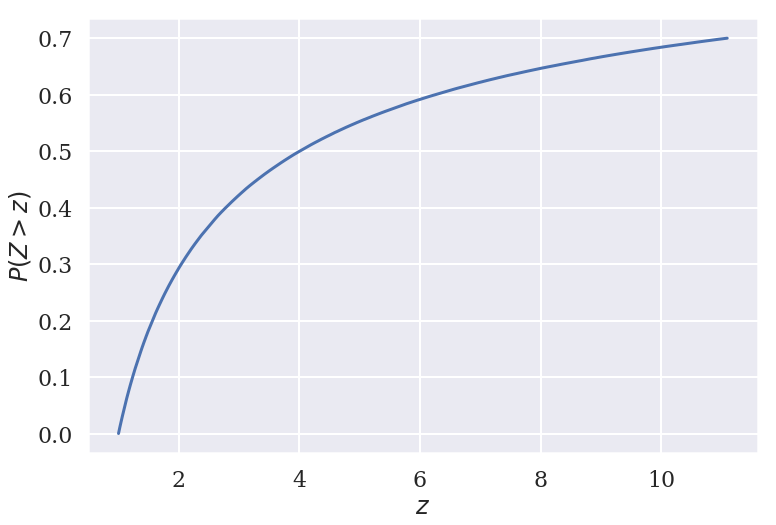

In [5]:
cutoff = int(7e5)
plot(z[:cutoff], cdf[:cutoff])
xlabel(r"$z$")
ylabel(r"$P(Z > z)$")

show()

k = 1.21074322361, alpha = -1.5000399963


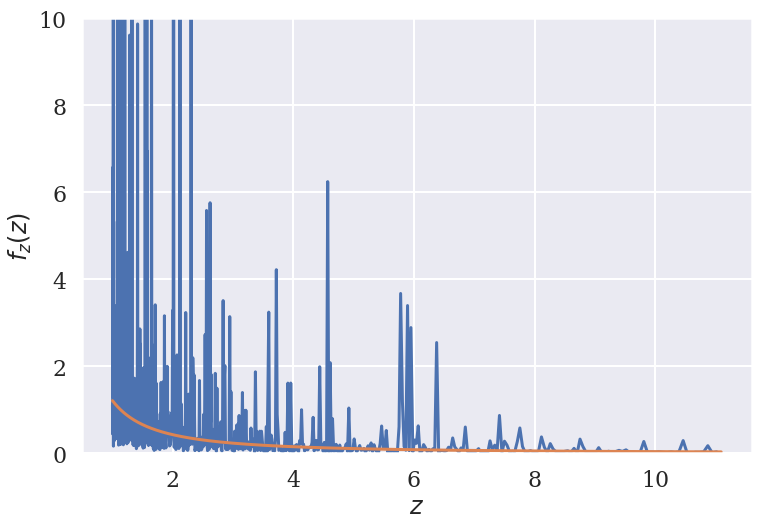

In [9]:
diffen = (cdf[1:] - cdf[:-1]) / (z[1:] - z[:-1])
fz = zeros(diffen.shape)

fz[0] = diffen[0]
fz = 0.5 * (diffen[1:] + diffen[:-1]) 
fz[-1] = diffen[-1]

alpha, log_k = polyfit(log(z[1:-1]), log(fz), 1)

k = exp(log_k)
pdf = k*z**alpha

print("k = {}, alpha = {}".format(k, alpha))

plot(z[:cutoff:1000], fz[:cutoff:1000])
plot(z[:cutoff], pdf[:cutoff])
ylim(0.0, 10.0)
xlabel(r"$z$")
ylabel(r"$f_z(z)$")
show()

In [7]:
print(pdf[:100])

[1.21074309 1.21073293 1.21073205 1.21072608 1.21072591 1.21072471
 1.21072025 1.21071672 1.21071666 1.21071423 1.21071304 1.21070941
 1.21069541 1.21069483 1.21068507 1.21067908 1.21067856 1.21067465
 1.21067012 1.21067004 1.21066748 1.21066727 1.21066234 1.21065666
 1.21064914 1.21064606 1.21064593 1.21064149 1.21064    1.21063631
 1.21063275 1.21062375 1.2106235  1.21062324 1.21062117 1.21061288
 1.21060979 1.21060065 1.21059477 1.21059143 1.21058892 1.21058504
 1.21058354 1.2105825  1.21057634 1.21057144 1.21057128 1.21056667
 1.21056495 1.21056196 1.21055633 1.21055524 1.21053698 1.21053117
 1.21053072 1.21052947 1.21052604 1.21052196 1.21051962 1.21051657
 1.21051472 1.21051389 1.21051279 1.21050797 1.21050575 1.21050463
 1.21050128 1.21050015 1.21049202 1.21048975 1.21047497 1.21047476
 1.21046924 1.21045906 1.21045787 1.21045695 1.21045484 1.21044857
 1.21044679 1.21044332 1.2104418  1.21043432 1.2104333  1.21042581
 1.21042494 1.2104173  1.21040826 1.21040817 1.21040712 1.2104

In [8]:
print(fz[:100])

[ 1.11420176  1.17686361  5.76464028  6.36729426  0.95823482  0.46059996
 15.55057299 15.66732089  1.13950273  1.01560515  0.31478899  1.62942749
  1.6575456   0.24463948  1.90991038  1.99011638  0.43253081 11.55100258
 11.7053537   4.68133166  4.51040821  0.34396218  0.28063034  0.41504324
  7.40997578  7.32016079  0.81582232  0.8572869   0.50057233  0.35557015
  3.76415644  7.11901016  3.8938849   0.54768313  0.40325696  0.39300399
  0.25377555  0.42603796  0.63353514  0.5956467   0.84130684  1.48118465
  1.02096225  0.33270785  5.8107045   5.82203674  0.72750478  0.83434515
  0.46455356  1.00005336  0.88870715  0.20578817  2.20615439  2.77116623
  0.98616043  0.48754871  0.61071237  0.6853441   0.78946256  1.58680959
  1.91670745  1.01056658  0.59799137  1.220818    1.08163112  1.07874823
  0.91984948  0.51189052  0.46169866  4.35801981  4.46118104  0.25367412
  0.85350346  1.75223668  1.41740765  0.57451086  0.65261178  0.76987869
  0.85965183  0.71868043  1.01711461  1.01699167  1